In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import decomposition
from __future__ import division

READ FILES

In [2]:
training_data = np.genfromtxt('final_training_data.dat', delimiter=',', unpack=True)
training_labels = np.genfromtxt('final_training_labels.dat', delimiter=',', unpack=True)
tuning_data = np.genfromtxt('final_tuning_data.dat', delimiter=',', unpack=True)
tuning_labels = np.genfromtxt('final_tuning_labels.dat', delimiter=',', unpack=True)
testing_data = np.genfromtxt('final_testing_data.dat', delimiter=',', unpack=True)
testing_labels = np.genfromtxt('final_testing_labels.dat', delimiter=',', unpack=True)
print('training_data shape', training_data.shape)
print('training_labels shape', training_labels.shape)
print('tuning_data shape', tuning_data.shape)
print('tuning_labels shape', tuning_labels.shape)
print('testing_data shape', testing_data.shape)
print('testing_labels shape', testing_labels.shape)

('training_data shape', (3857L, 39L))
('training_labels shape', (3857L,))
('tuning_data shape', (1135L, 39L))
('tuning_labels shape', (1135L,))
('testing_data shape', (1551L, 39L))
('testing_labels shape', (1551L,))


PCA

In [3]:
training_data -= np.mean(training_data,axis=1).reshape(training_data[:,1].size,1)
print(training_data.shape)
U, W, _ = np.linalg.svd(training_data)
E, L = U, W**2 / (training_data[0,:].size-1) 

(3857L, 39L)


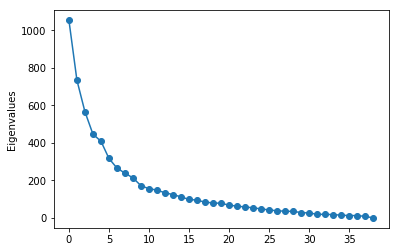

In [4]:
plt.plot(L,'o-'); plt.ylabel('Eigenvalues');
plt.show();

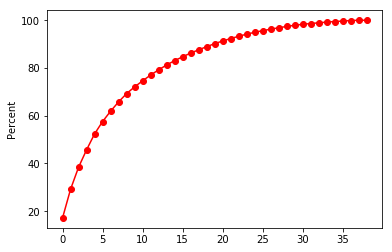

In [5]:
cl=np.cumsum(L);
plt.plot(100*cl/cl[-1],'o-r'); 
plt.ylabel('Percent');
plt.show();

In [6]:
numNewFeatures = 2
pca = decomposition.PCA(numNewFeatures)
training_data_new = pca.fit_transform(training_data) # note the transpose
print pca.components_.shape, pca.explained_variance_
print training_data_new.shape

pca = decomposition.PCA(numNewFeatures)
testing_data_new = pca.fit_transform(testing_data) # note the transpose
print pca.components_.shape, pca.explained_variance_
print testing_data_new.shape

(2L, 39L) [ 9.29595013  6.26731937]
(3857L, 2L)
(2L, 39L) [ 10.32479045   7.15401004]
(1551L, 2L)


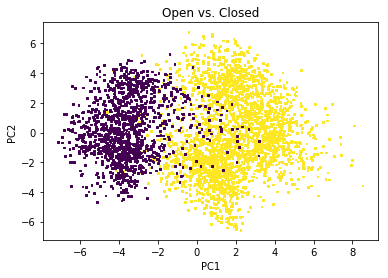

In [7]:
if numNewFeatures == 2:
    plt.scatter(training_data_new[:,0],training_data_new[:,1], c=training_labels, marker=',', s=3)
    plt.title('Open vs. Closed')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    #We need legend here. I dont know which one is open which is closed.
    plt.show()

SVM, NN, LOG REG

In [8]:
all_acc_svm = []
all_acc_nn = []
all_acc_log = []
for numNewFeatures in range(1, 40):

    pca = decomposition.PCA(numNewFeatures)
    training_data_new = pca.fit_transform(training_data) 

    pca = decomposition.PCA(numNewFeatures)
    testing_data_new = pca.fit_transform(testing_data) 

    net_momentum = MLPClassifier(hidden_layer_sizes=(10, 5), solver='sgd', random_state=1, momentum=0.9, max_iter=10000)
    logistic = LogisticRegression()
    svm = SVC(kernel='rbf', C = 1.0)

    net_momentum.fit(training_data_new, training_labels)
    predict_nn = net_momentum.predict(testing_data_new)
    con_mat_nn = confusion_matrix(testing_labels, predict_nn)
    acc_nn = (con_mat_nn[0,0] + con_mat_nn[1,1]) / sum(sum(con_mat_nn))

    logistic.fit(training_data_new, training_labels)
    predict_log = logistic.predict(testing_data_new)
    con_mat_log = confusion_matrix(testing_labels, predict_log)
    acc_log = (con_mat_log[0,0] + con_mat_log[1,1]) / sum(sum(con_mat_log))

    svm.fit(training_data_new, training_labels)
    predict_svm = svm.predict(testing_data_new)
    con_mat_svm = confusion_matrix(testing_labels, predict_svm)
    acc_svm = s(con_mat_svm[0,0] + con_mat_svm[1,1]) / sum(sum(con_mat_svm))
    
    all_acc_svm.append(acc_svm)
    all_acc_nn.append(acc_nn)
    all_acc_log.append(acc_log)

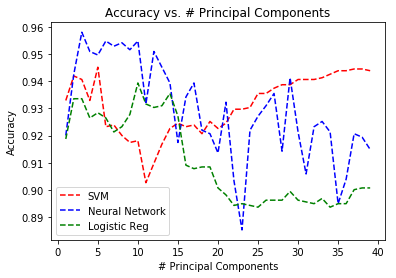

In [9]:
#fig = plt.figure()
ax = plt.subplot(111)
dim = np.linspace(1,39,39)

for acc, line, algo  in [[all_acc_svm, 'r--', 'SVM'],
                    [all_acc_nn, 'b--', 'Neural Network'],
                    [all_acc_log, 'g--', 'Logistic Reg']]:
    ax.plot(dim, acc, line, label = algo)
    
ax.legend()
plt.title('Accuracy vs. # Principal Components')
plt.xlabel('# Principal Components')
plt.ylabel('Accuracy')

plt.show()